In [2]:
# -*- coding: utf-8 -*-
from __future__ import division
from numpy.random import randn
import numpy as np
import os
import matplotlib.pyplot as plt

np.random.seed(12345)
plt.rc('figure', figsize=(10, 6))
from pandas import Series, DataFrame
import pandas as pd

np.set_printoptions(precision=4)

get_ipython().magic(u'matplotlib inline')
get_ipython().magic(u'pwd')

'C:\\Users\\41914\\OneDrive\\Language\\new\\learn_python\\Learn_Python\\7'

# matplotlib创建图表

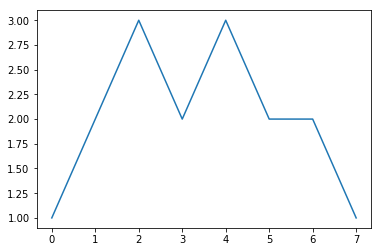

In [3]:
plt.plot([1,2,3,2,3,2,2,1])
plt.show()

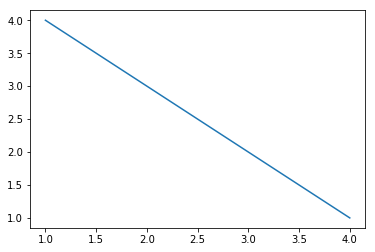

In [4]:
plt.plot([4,3,2,1],[1,2,3,4])
plt.show()

## 更多简单的图形

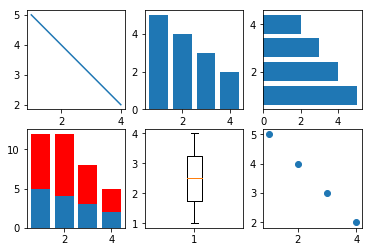

In [5]:
x = [1,2,3,4]
y = [5,4,3,2]

plt.figure()

plt.subplot(2,3,1)
plt.plot(x, y)

plt.subplot(232)
plt.bar(x, y)

plt.subplot(233)
plt.barh(x, y)

plt.subplot(234)
plt.bar(x, y)
y1 = [7,8,5,3]
plt.bar(x, y1, bottom=y, color = 'r')

plt.subplot(235)
plt.boxplot(x)

plt.subplot(236)
plt.scatter(x,y)

plt.show()

# figure与subplot
## figure对象

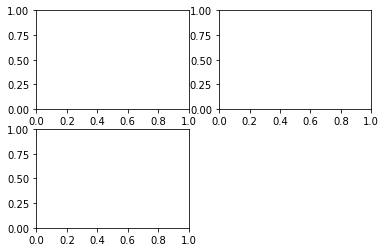

In [6]:
fig = plt.figure()

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
plt.show()

C:\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


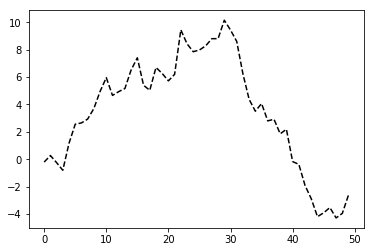

In [7]:
from numpy.random import randn
plt.plot(randn(50).cumsum(), 'k--')
fig.show()

In [8]:
_ = ax1.hist(randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * randn(30))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000285390D9860>,
      dtype=object)

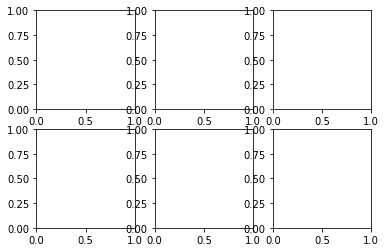

In [9]:
plt.close('all')

fig, axes = plt.subplots(2, 3)
axes

## 调整subplot周围的间距

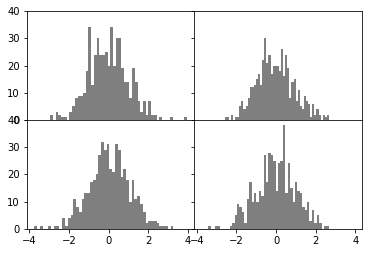

In [10]:
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

# matplotlib基本设置
## 颜色、标记和线型

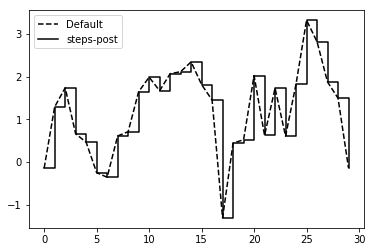

In [11]:
plt.figure()

plt.plot(x,y,linestyle='--',color='g')

plt.plot(randn(30).cumsum(), 'ko--')

plt.plot(randn(30).cumsum(),color='k',linestyle='dashed',marker='o')

plt.close('all')

data = randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

## 设置标题、轴标签、刻度以及刻度标签

Text(0.5,0,'Stages')

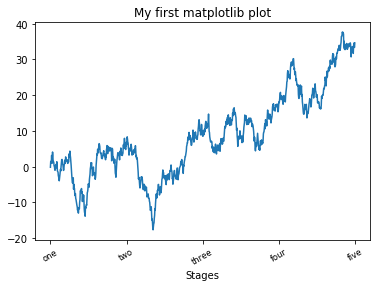

In [12]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum())

ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

## 添加图例

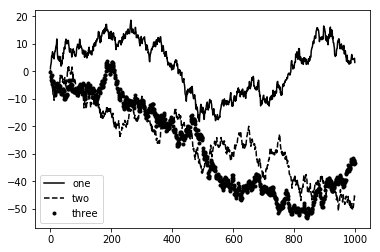

In [14]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')

ax.legend(loc='best')

## 注释以及在subplot上绘图

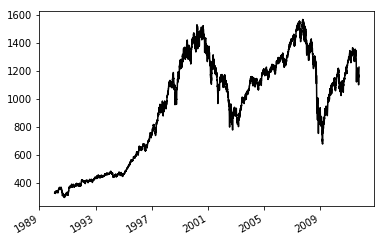

In [16]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('./data/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

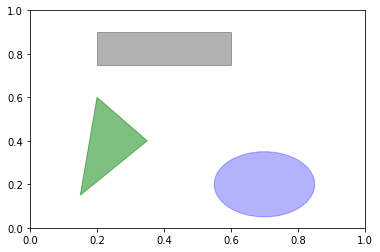

In [17]:
crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 50),
                xytext=(date, spx.asof(date) + 200),
                arrowprops=dict(facecolor='black'),
                horizontalalignment='left', verticalalignment='top')

ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in 2008-2009 financial crisis')

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

## 图表的保存

In [18]:
fig

fig.savefig('figpath.svg')

fig.savefig('figpath.png', dpi=400, bbox_inches='tight')

from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()

## matplotlib配置

In [38]:
plt.rc('figure', figsize=(10, 10))
font = {'family' : 'monospace',
          'weight' : 'bold',
          'size'   : 'larger'}

#plt.rc('font', **font)

plt.close('all')


# pandas中的绘图函数
## 线图

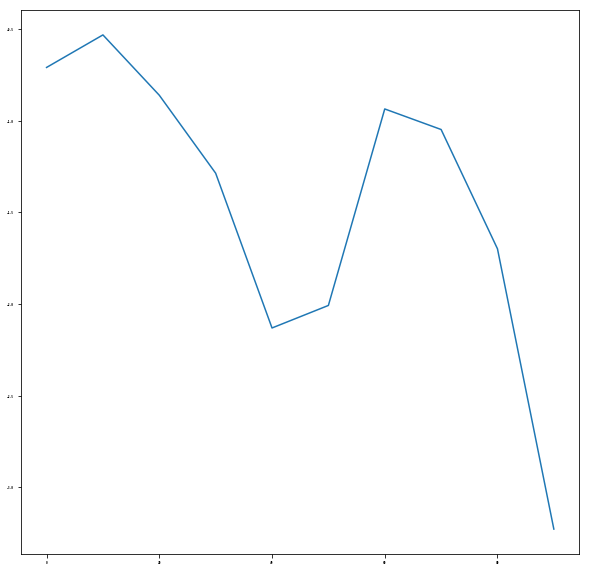

In [39]:
s = Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

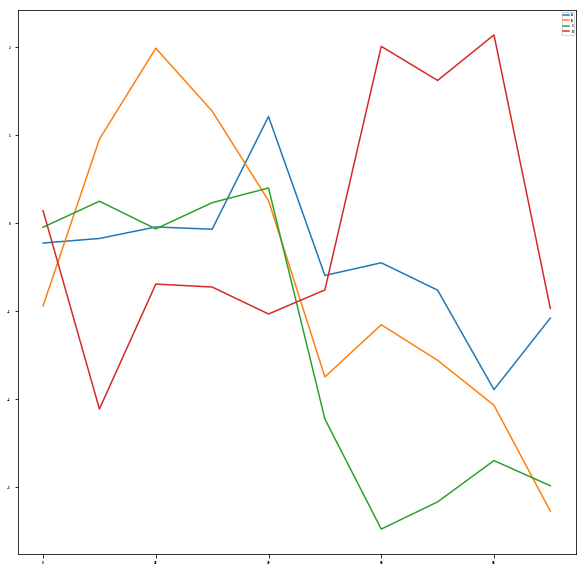

In [41]:
df = DataFrame(np.random.randn(10, 4).cumsum(0),
               columns=['A', 'B', 'C', 'D'],
               index=np.arange(0, 100, 10))
df.plot()

## 柱形图

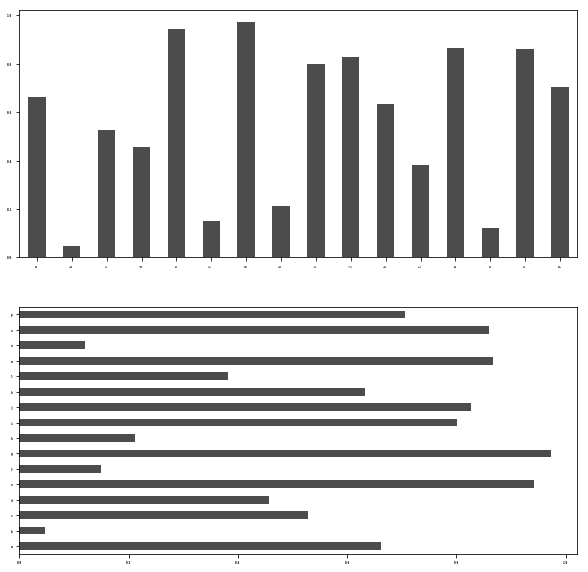

In [42]:
fig, axes = plt.subplots(2, 1)
data = Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot(kind='bar', ax=axes[0], color='k', alpha=0.7)
data.plot(kind='barh', ax=axes[1], color='k', alpha=0.7)

Genus         A         B         C         D
one    0.817083  0.313457  0.369627  0.361528
two    0.732777  0.694032  0.967338  0.873645
three  0.146582  0.503590  0.752592  0.446608
four   0.469520  0.645918  0.157386  0.171072
five   0.664322  0.109933  0.234558  0.598316
six    0.449414  0.502062  0.323386  0.267788


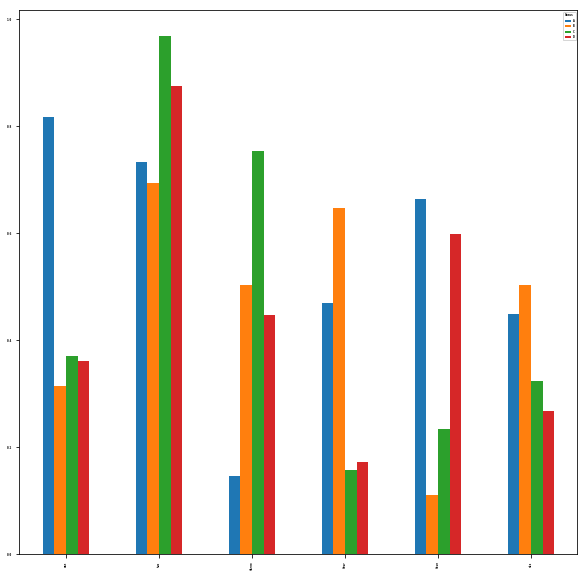

In [44]:
df = DataFrame(np.random.rand(6, 4),
               index=['one', 'two', 'three', 'four', 'five', 'six'],
               columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
print(df)
df.plot(kind='bar')

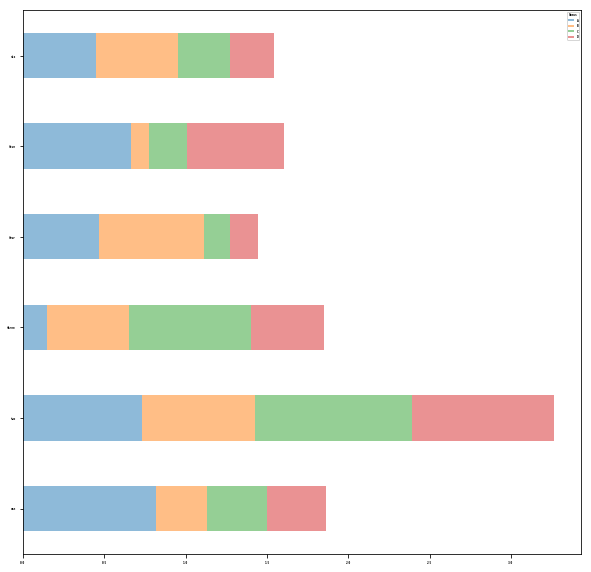

In [45]:
plt.figure()

df.plot(kind='barh', stacked=True, alpha=0.5)

In [46]:
tips = pd.read_csv('./data/tips.csv')
party_counts = pd.crosstab(tips.day, tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


size         2         3         4         5
day                                         
Fri   0.888889  0.055556  0.055556  0.000000
Sat   0.623529  0.211765  0.152941  0.011765
Sun   0.520000  0.200000  0.240000  0.040000
Thur  0.827586  0.068966  0.086207  0.017241 



C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


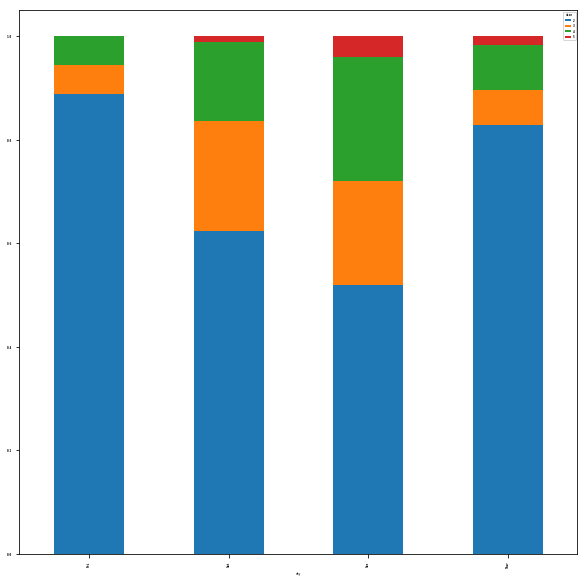

In [47]:
party_counts = party_counts.ix[:, 2:5]

party_pcts = party_counts.div(party_counts.sum(1).astype(float), axis=0)
print(party_pcts,"\n")

party_pcts.plot(kind='bar', stacked=True)


## 直方图和密度图

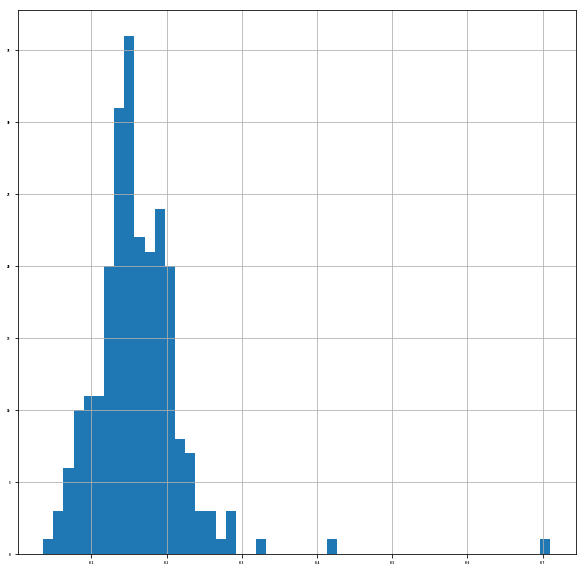

In [49]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']
plt.figure()
tips['tip_pct'].hist(bins=50)

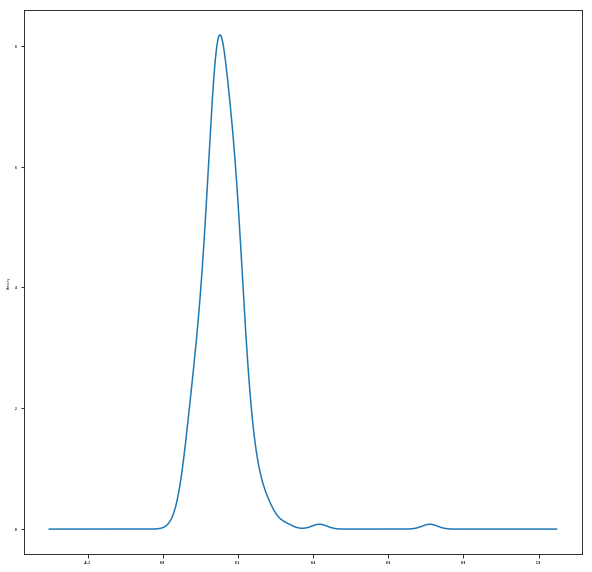

In [50]:
plt.figure()

tips['tip_pct'].plot(kind='kde')

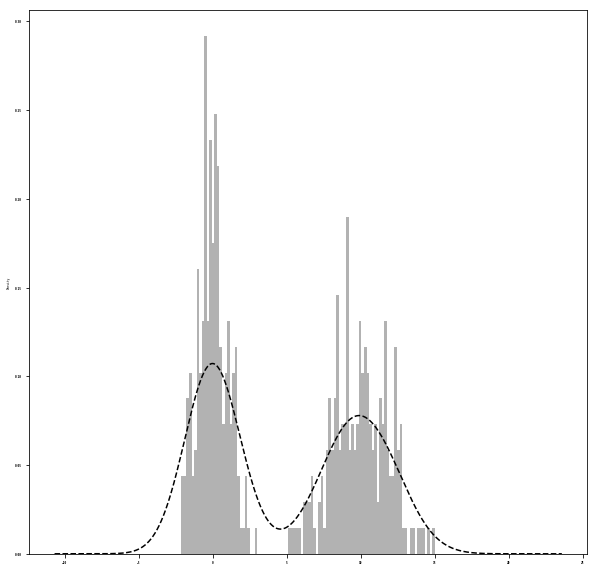

In [51]:
plt.figure()

comp1 = np.random.normal(0, 1, size=200)  # N(0, 1)
comp2 = np.random.normal(10, 2, size=200)  # N(10, 4)
values = Series(np.concatenate([comp1, comp2]))
values.hist(bins=100, alpha=0.3, color='k', normed=True)
values.plot(kind='kde', style='k--')

## 散点图

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  # This is added back by InteractiveShellApp.init_path()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002853D65DCF8>,
      dtype=object)

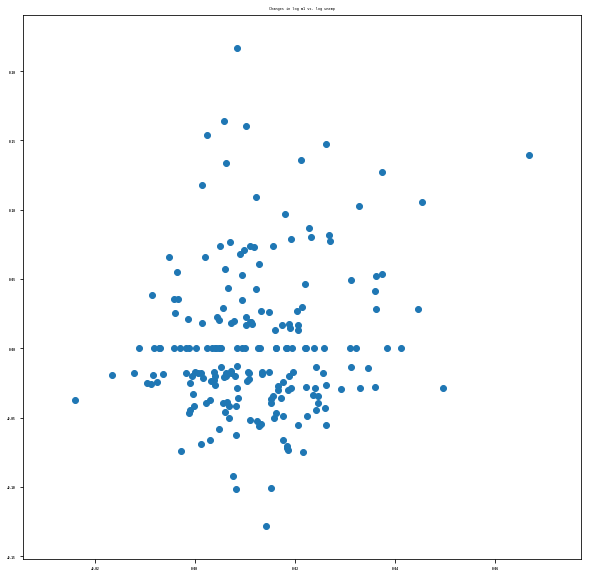

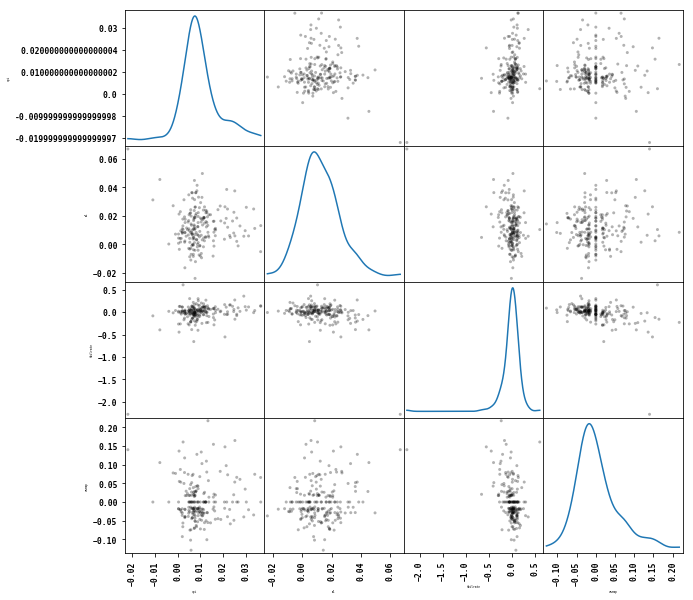

In [52]:
macro = pd.read_csv('./data/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

plt.figure()

plt.scatter(trans_data['m1'], trans_data['unemp'])
plt.title('Changes in log %s vs. log %s' % ('m1', 'unemp'))

pd.scatter_matrix(trans_data, diagonal='kde', color='k', alpha=0.3)

# Matplotlib作图
## 误差条形图

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


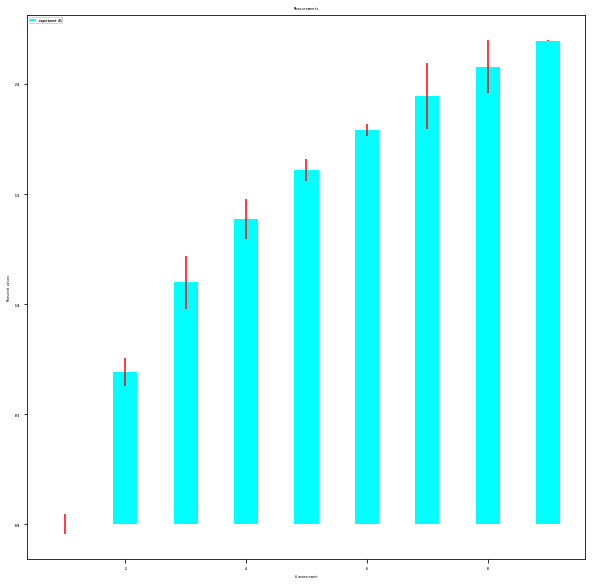

In [53]:
x = np.arange(0, 10, 1)

y = np.log(x)

xe = 0.1 * np.abs(np.random.randn(len(y)))

plt.bar(x, y, yerr=xe, width=0.4, align='center', ecolor='r', color='cyan',
                                                    label='experiment #1');

plt.xlabel('# measurement')
plt.ylabel('Measured values')
plt.title('Measurements')
plt.legend(loc='upper left')

plt.show()

## 饼图

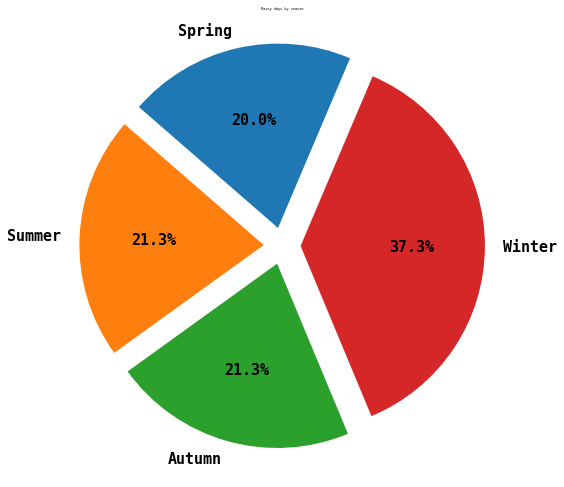

In [65]:
plt.figure(1, figsize=(8, 8))
ax = plt.axes([0.1, 0.1, 0.8, 0.8])
font1 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 23,
}

labels = 'Spring', 'Summer', 'Autumn', 'Winter'
values = [15, 16, 16, 28]
explode =[0.1, 0.1, 0.1, 0.1]

plt.pie(values, explode=explode, labels=labels,pctdistance = 0.6,
    autopct='%1.1f%%', startangle=67,textprops = { 'fontsize': 15, 'color': 'k'})
plt.title('Rainy days by season')

plt.show()

## 等高线图

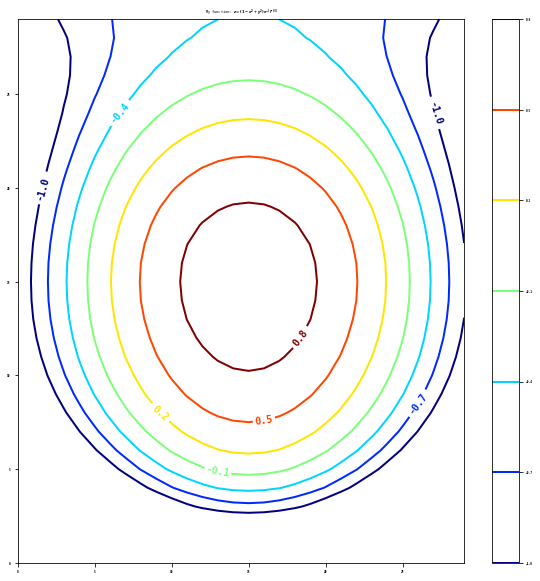

In [66]:
import matplotlib as mpl

def process_signals(x, y):
    return (1 - (x ** 2 + y ** 2)) * np.exp(-y ** 3 / 3)

x = np.arange(-1.5, 1.5, 0.1)
y = np.arange(-1.5, 1.5, 0.1)

X, Y = np.meshgrid(x, y)

Z = process_signals(X, Y)

N = np.arange(-1, 1.5, 0.3)

CS = plt.contour(Z, N, linewidths=2, cmap=mpl.cm.jet)
plt.clabel(CS, inline=True, fmt='%1.1f', fontsize=10)
plt.colorbar(CS)

plt.title('My function: $z=(1-x^2+y^2) e^{-(y^3)/3}$')
plt.show()

# 3D图像
## 3d柱形图

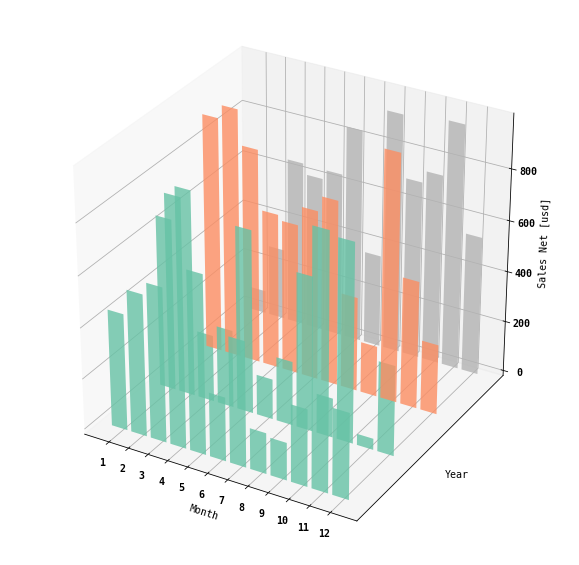

In [78]:
import matplotlib.dates as mdates
from mpl_toolkits.mplot3d import Axes3D

mpl.rcParams['font.size'] = 10

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for z in [2011, 2012, 2013, 2014]:
    xs = range(1,13)
    ys = 1000 * np.random.rand(12)
    
    color = plt.cm.Set2(np.random.choice(range(plt.cm.Set2.N)))
    ax.bar(xs, ys, zs=z, zdir='y', color=color, alpha=0.8)

ax.xaxis.set_major_locator(mpl.ticker.FixedLocator(xs))
ax.yaxis.set_major_locator(mpl.ticker.FixedLocator(ys))


ax.set_xlabel('Month')
ax.set_ylabel('Year')
ax.set_zlabel('Sales Net [usd]')

plt.show()

## 3d直方图

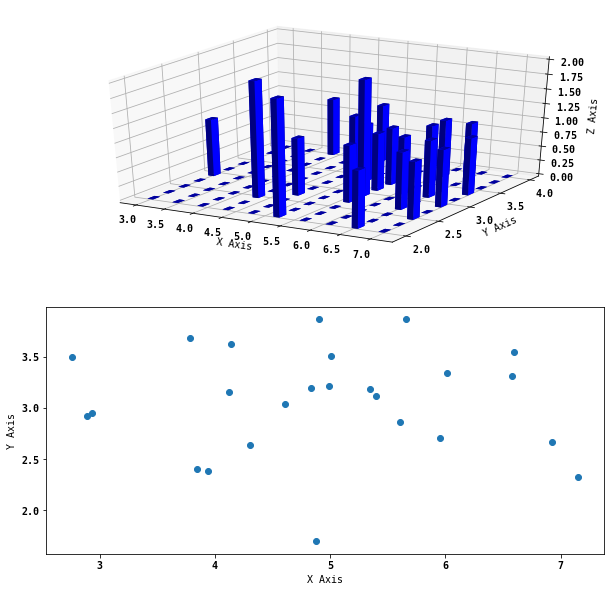

In [79]:
mpl.rcParams['font.size'] = 10

samples = 25

x = np.random.normal(5, 1, samples)
y = np.random.normal(3, .5, samples)

fig = plt.figure()
ax = fig.add_subplot(211, projection='3d')

hist, xedges, yedges = np.histogram2d(x, y, bins=10)

elements = (len(xedges) - 1) * (len(yedges) - 1)
xpos, ypos = np.meshgrid(xedges[:-1]+.25, yedges[:-1]+.25)

xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros(elements)

dx = .1 * np.ones_like(zpos)
dy = dx.copy()

dz = hist.flatten()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b', alpha=0.4)
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

ax2 = fig.add_subplot(212)
ax2.scatter(x, y)
ax2.set_xlabel('X Axis')
ax2.set_ylabel('Y Axis')

plt.show()